# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [271]:
# The data was imported directly from the source link and assigned under the variable filepath. The data was read using the panda read_csv function.
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [273]:
#To confirm that the data is properly read, the first five rows of the data was read using the df.head() function.
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 

In [275]:
#To visualize the datatype of each feature, the df.dtypes function was used.
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.


In [277]:
# to find the statstical summary of the dataframe, df.describe function was used.
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


In [279]:
#The 'id' and 'Unnamed:0' columns are not required for analysis. So, they need to be dropped from the dataframe.
#The axis=1 argument ensures that the entire columns is dropped and the inplace=True arguement ensures that the chnage is made on the original dataframe. 
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [281]:
# The presence of missing values was ckecked by the isna() function. bedrooms and bathrooms contain missing value.
df.isna().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [282]:
# print the nulls in bedroom and bathrooms.
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [284]:
# replace the missing value in bedrooms with a mean value.
# first calculate the mean.
mean = df['bedrooms'].mean()
# replace nulls using the replace() function. 
df['bedrooms'] = df['bedrooms'].replace(np.nan, mean)
df['bedrooms'] = df['bedrooms'].infer_objects(copy=False)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [286]:
# replace the nulls values in the column bathrooms with a mean value.
mean=df['bathrooms'].mean()
df['bathrooms'] = df['bathrooms'].replace(np.nan, mean)
df['bathrooms'] = df['bathrooms'].infer_objects(copy=False)

In [287]:
# the replacement of the nulls was confirmed by counting the null values in the two columns. Indee,nulls are replaced.
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


In [289]:
#To determine the unique number if floors the unique() function was used.
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [290]:
# Next, the number of houses with the unique number of floors was determined.
houses = df.floors.value_counts().to_frame().reset_index()
houses.columns = ['floors','num_houses']
houses

,floors,num_houses
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


Text(0.5, 1.0, 'Number of houses per floor type')

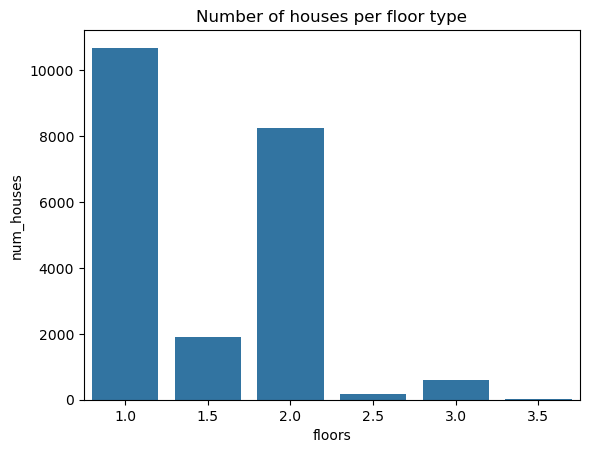

In [291]:
# visualize the number of houses with bargraph.
sns.barplot(data=houses, x='floors', y='num_houses')
plt.title('Number of houses per floor type')

In [292]:
# The number of houses per waterfront type
houses_waterfront = df.waterfront.value_counts().to_frame().reset_index()
houses_waterfront.columns = ['waterfront','num_houses']
houses_waterfront

,waterfront,num_houses
0,0,21450
1,1,163


Text(0.5, 1.0, 'number of houses per waterfront')

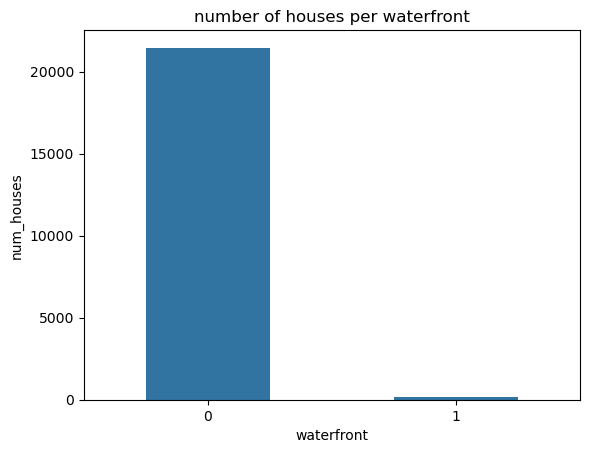

In [293]:
# visualization of the number of houses per waterfront view using bargraph
sns.barplot(data=houses_waterfront, x='waterfront',y='num_houses', width=0.5)
plt.title('number of houses per waterfront')

Text(0.5, 1.0, 'house price distribution within the waterfront view')

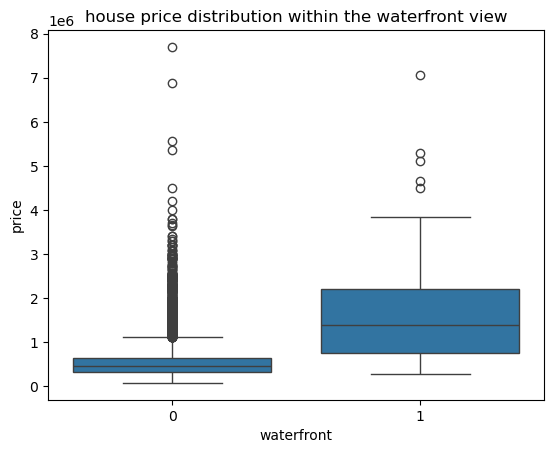

In [294]:
# to visualize how the prices of the houses vary by waterfront view, box plot was used.
# There are many outliers in price of houses with not waterfront view. 
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('house price distribution within the waterfront view')

In [295]:
# how many houses have prices that lie outside of the whiskers or outside of the 1.5 * IQR? 1063 houses are outliers.
no_waterfront = df[df['waterfront']==0]
IQR = no_waterfront['price'].quantile(0.75) - no_waterfront['price'].quantile(0.25)
Q_75 = no_waterfront['price'].quantile(0.75)
Upper_limit = Q_75 + 1.5 * IQR
print(Upper_limit)
num_outliers = no_waterfront[no_waterfront['price'] > Upper_limit].shape
print(num_outliers)

1119742.5
(1063, 20)


In [313]:
# what is the proportion of houses with outlier prices in non_waterfront views? nearly 5% of the houses have outlier prices.
proportion = num_outliers[0] / no_waterfront.shape[0]
proportion

0.049557109557109555

In [341]:
# exclude the outlier house prices from both waterfront views.
clean_df1 = df[((df['waterfront'] == 0) & (df['price'] <= Upper_limit)) | ((df['waterfront'] == 1) & (df['price'] <= 4000000))]
house_wfv = clean_df1.waterfront.value_counts().to_frame().reset_index()
house_wfv


,waterfront,count
0,0,20387
1,1,158


<Axes: xlabel='waterfront', ylabel='price'>

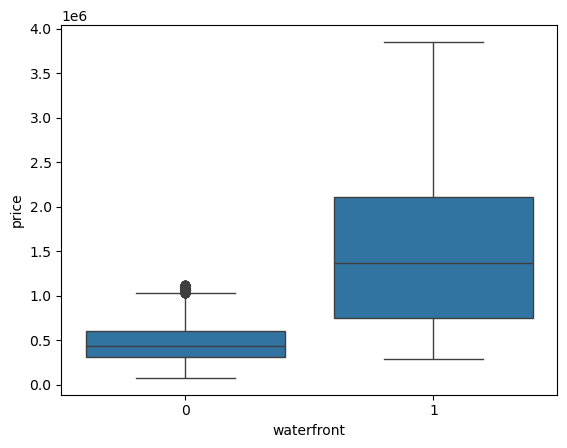

In [347]:
# look at the distribution of prices in cleaned prices
sns.boxplot(data=clean_df1, x='waterfront', y='price')

In [355]:
# calculate the mean house price per view and plot it.
mean_price = clean_df1.groupby('waterfront')['price'].mean().to_frame().reset_index()
mean_price

,waterfront,price
0,0,4.757950e+05
1,1,1.545851e+06


Text(0.5, 1.0, 'The average price of house per waterfront view')

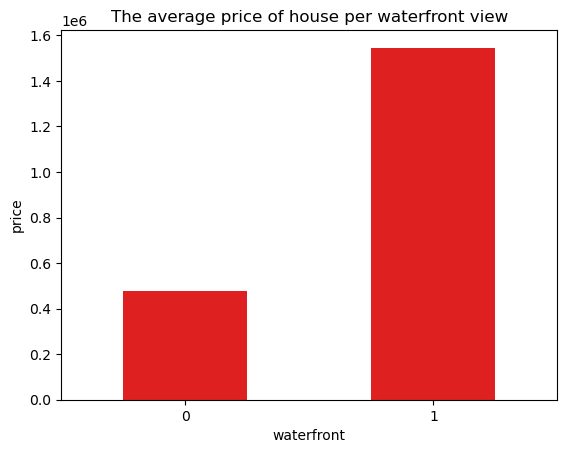

In [369]:
# plot the price with barplot
sns.barplot(data=mean_price, x='waterfront', y='price', width=0.5, color='red')
plt.title('The average price of house per waterfront view')

Text(0.5, 1.0, 'Correlation Heatmap')

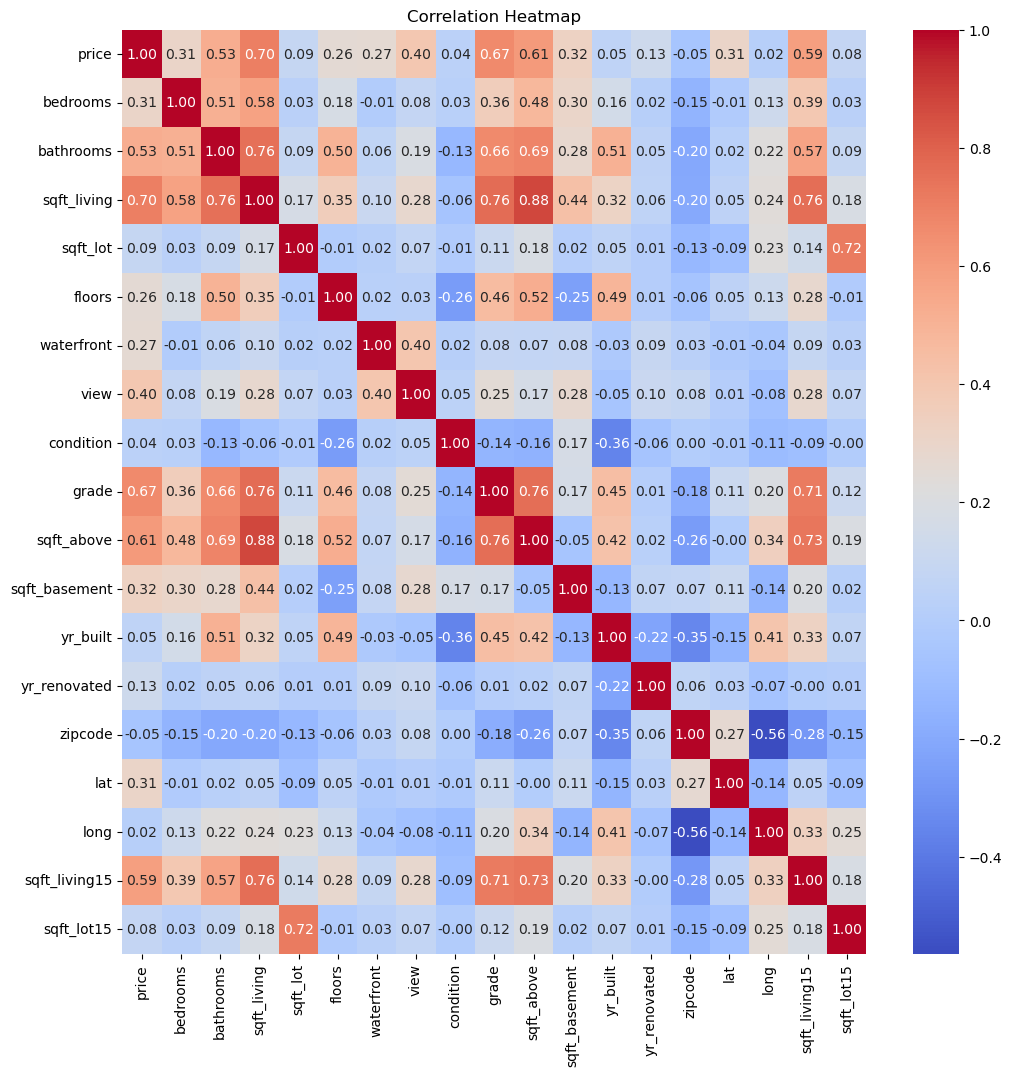

In [391]:
# how does the features correlate with price and with each other?
correlation = df.drop(columns='date').corr()
plt.figure(figsize=(12,12))
sns.heatmap(data=correlation, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')

sqft_living15, sqft_above, grade, sqft_living, and bathroom have  a strong correlation with price. Whereas, latitude, sqft_basmeent, view, baderooms, floors and waterfront have weak positice correlation.

Text(0.5, 1.0, 'Correlation between sqft_above and price')

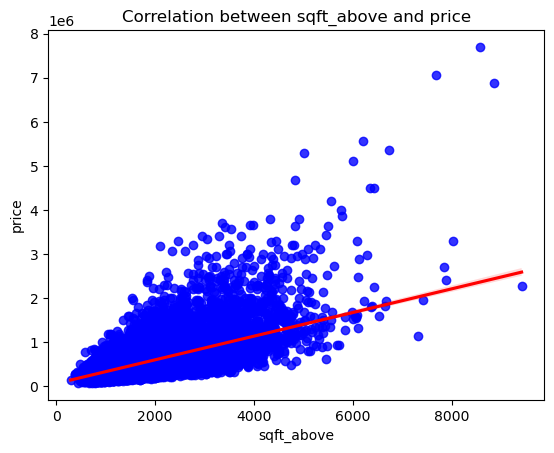

In [395]:
# visualize the correlation of sqft_above and price with regression plot.
sns.regplot(data=df, x='sqft_above', y='price',color='b',line_kws={'color':'red'})
plt.title('Correlation between sqft_above and price')

# Module 4: Model Development


In [397]:
# Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
X = df[['long']]
Y = df['price']
lm = LinearRegression() 
lm.fit(X,Y)
lm.score(X, Y) # the r2 value shows that the linear model is not a good fit for longtude and price correlation. 

0.00046769430149007363

<Axes: xlabel='long', ylabel='price'>

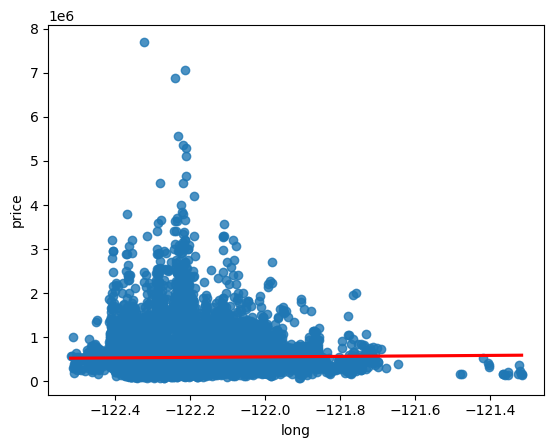

In [401]:
# visualize the correlation between longtide and price.
sns.regplot(data=df, x='long', y='price', line_kws={'color':'red'})

In [403]:
#Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.
x_data = df[['sqft_living']]
y_data = df['price']
lm.fit(x_data, y_data)
lm.score(x_data, y_data) # determines the level of fittness of the model. Iti still cannot be cosidered as best fit.

0.4928532179037931

<Axes: xlabel='sqft_living', ylabel='price'>

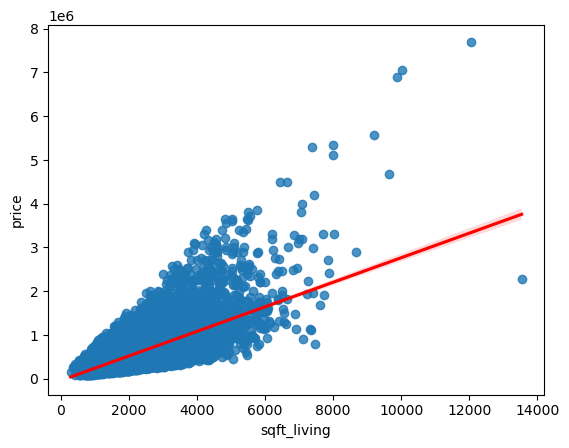

In [405]:
# Visualize the correlation between sqft_living and price correlation with regplot.
sns.regplot(data=df, x='sqft_living', y='price', line_kws={'color':'red'})

In [409]:
# these features show variable degree of positive correlation with price.
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [411]:
#Fit a linear regression model to predict the 'price' using the list of features above:
z_data = df[features]
lm.fit(z_data, y_data)
r2 = lm.score(z_data, y_data)
print(r2) # The fittness of the model is imprive by increasing the number of features.

0.6576488694507887


In [415]:
# create list of tuples containing names of estimators. I wanted to improve the performace of the model.
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [419]:
# Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.
from sklearn.metrics import r2_score
pip = Pipeline(Input)
pip.fit(z_data, y_data)
y_pred = pip.predict(z_data) # after fitting the model, the price was predicted.
r2_score(y_data, y_pred) # the devition of the predicted price is compared against the real price.

0.7512183435262716

Text(0.5, 1.0, 'price real vv predicted price')

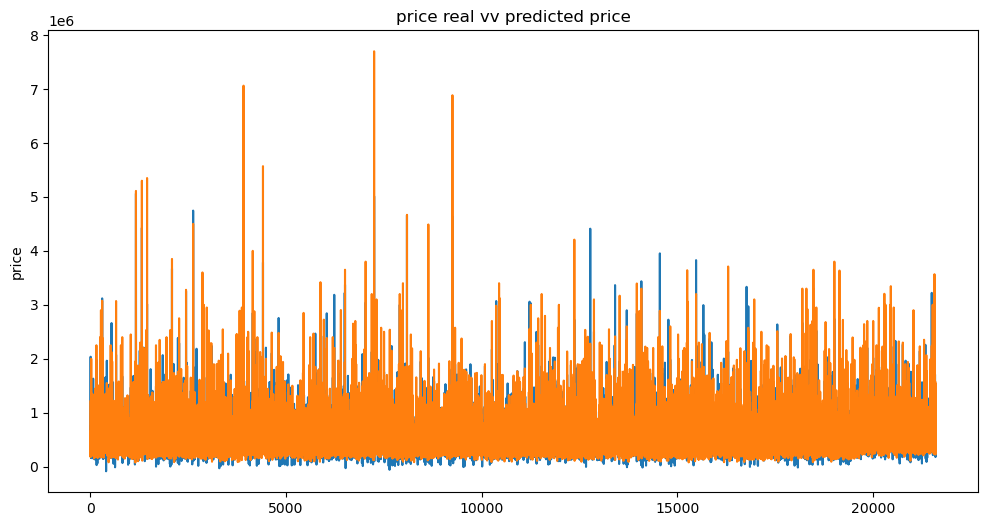

In [441]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=y_pred)
sns.lineplot(data=y_data)
plt.title('price real vv predicted price')

# Module 5: Model Evaluation and Refinement 

In [443]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [445]:
# in the cell above the whole data set was used to train the model and predict the price based on the seen data. 
# Now, I splitted the data into train and test sets and the model is trained with the train data. Then the unseen test data is used to predict price. 
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1) # 15% of the data is separated for testing the model.
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [449]:
from sklearn.linear_model import Ridge

In [451]:
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 
rrmodel = Ridge(alpha=0.1) # a model object is created.
rrmodel.fit(x_train, y_train)
rrmodel.score(x_test, y_test) # The model has a 65% fittnes 

0.6478759163939123

In [453]:
#Perform a second order polynomial transform on both the training data and testing data. 
# Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and 
# calculate the R^2 utilising the test data provided.
poly = PolynomialFeatures(degree=2)
x_train_p = poly.fit_transform(x_train)
x_test_p = poly.fit_transform(x_test)
rrmodel.fit(x_train_p, y_train)
rrmodel.score(x_test_p, y_test)

0.7002744251795704